In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import time
from datetime import datetime


In [ ]:
# Porta da api de contratos

url = 'https://dadosabertos.compras.gov.br/modulo-contratos/2_consultarContratosItem'


In [ ]:
dados = []

anos = [2023,2024,2025]


#Loop in cada ano
for ano in anos:
    #setar o range de data para o ano no loop
    start_date = f'{ano}-01-01'
    end_date = f'{ano}-12-31'
    
    # parametros da api
    params = {
        'pagina': 1,
        'tamanhoPagina': 500,
        'dataVigenciaInicialMin': start_date,
        'dataVigenciaInicialMax': end_date

    }
    
    try:
        # fazer requerimento para saber o número total de paginas
        response = requests.get(url, params=params)
        response.raise_for_status()
        initial_response = response.json()
        paginastotais = initial_response.get('totalPaginas', 1)
        
        # pegar os dados da primeira pagina
        if 'resultado' in initial_response and isinstance(initial_response['resultado'], list):
            dados.extend(initial_response['resultado'])
        
        print(f"total de paginas para puxar de {ano}: {paginastotais}")

        # passar o loop nas paginas restantes
        for pagina in range(2, paginastotais + 1):
            params['pagina'] = pagina
            print(f"Coletando {pagina}/{paginastotais} de {ano}...")
            
            response = requests.get(url, params=params)
            response.raise_for_status()
            
            pag_response = response.json()
            if 'resultado' in pag_response and isinstance(pag_response['resultado'], list):
                dados.extend(pag_response['resultado'])
            else:
                print(f"Formato inexperado da pagina {pagina}.")
                break
            
    
    except requests.exceptions.RequestException as err:
        print(f"Erro ocorreu para o ano {ano}: {err}")
        break

print("\ndownloads completos.")

# Carregar todos os dados puxados da api em um dataframe
if dados:
    df = pd.DataFrame(dados)
    print(f"\ndataframe criado com {len(df)} de linhas.")
else:
    print("Nenhum dado foi carregado da api.")

Starting to download all data for the year 2023...
Total pages to download for 2023: 643
Fetching page 2/643 for 2023...
Fetching page 3/643 for 2023...
Fetching page 4/643 for 2023...
Fetching page 5/643 for 2023...
Fetching page 6/643 for 2023...
Fetching page 7/643 for 2023...
Fetching page 8/643 for 2023...
Fetching page 9/643 for 2023...
Fetching page 10/643 for 2023...
Fetching page 11/643 for 2023...
Fetching page 12/643 for 2023...
Fetching page 13/643 for 2023...
Fetching page 14/643 for 2023...
Fetching page 15/643 for 2023...
Fetching page 16/643 for 2023...
Fetching page 17/643 for 2023...
Fetching page 18/643 for 2023...
Fetching page 19/643 for 2023...
Fetching page 20/643 for 2023...
Fetching page 21/643 for 2023...
Fetching page 22/643 for 2023...
Fetching page 23/643 for 2023...
Fetching page 24/643 for 2023...
Fetching page 25/643 for 2023...
Fetching page 26/643 for 2023...
Fetching page 27/643 for 2023...
Fetching page 28/643 for 2023...
Fetching page 29/643 for 202

In [11]:
df.columns

Index(['codigoOrgao', 'codigoUnidadeGestora',
       'codigoUnidadeGestoraOrigemContrato', 'codigoUnidadeRealizadoraCompra',
       'codigoModalidadeCompra', 'numeroContrato', 'niFornecedor',
       'nomeRazaoSocialFornecedor', 'processo', 'dataVigenciaInicial',
       'dataVigenciaFinal', 'valorGlobal', 'tipoItem', 'codigoItem',
       'descricaoIitem', 'quantidadeItem', 'valorUnitarioItem',
       'valorTotalItem', 'dataHoraInclusao', 'numeroControlePncpContrato',
       'idCompra', 'dataHoraExclusaoContrato', 'contratoExcluido', 'nomeOrgao',
       'nomeUnidadeGestora', 'nomeUnidadeGestoraOrigemContrato',
       'nomeUnidadeRealizadoraCompra', 'nomeModalidadeCompra', 'numeroCompra',
       'dataHoraExclusaoItem', 'contratoItemExcluido', 'numeroItem'],
      dtype='object')

In [ ]:
###salvar o arquivo em csv para backup

###df.to_csv('contrato.csv')

In [28]:
df = pd.read_csv(r"C:\Users\ferre\Desktop\Python\contrato1_csv")

df

C:\Users\ferre\AppData\Local\Temp\ipykernel_16620\1803928767.py:1: DtypeWarning: Columns (7,20,22,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\ferre\Desktop\Python\contrato1_csv")


,Unnamed: 0,codigoOrgao,codigoUnidadeGestora,codigoUnidadeGestoraOrigemContrato,codigoUnidadeRealizadoraCompra,codigoModalidadeCompra,numeroContrato,niFornecedor,nomeRazaoSocialFornecedor,processo,...,contratoExcluido,nomeOrgao,nomeUnidadeGestora,nomeUnidadeGestoraOrigemContrato,nomeUnidadeRealizadoraCompra,nomeModalidadeCompra,numeroCompra,dataHoraExclusaoItem,contratoItemExcluido,numeroItem
0,0,52121,160177,160177,160177.0,07,00050/2023,04102208410,EVANILSON ANTONIO ROSA,64107.004946/2022-53,...,False,BASE ADMINISTRATIVA DO QUARTEL-GENERAL DO EXER...,71º BATALHAO DE INFANTARIA MOTORIZADO,71º BATALHAO DE INFANTARIA MOTORIZADO,71º BATALHAO DE INFANTARIA MOTORIZADO,Inexigibilidade,00003/2023,NaN,False,1.0
1,1,36000,250057,250057,257022.0,05,00467/2023,28387424000170,M MED COMERCIAL DE MEDICAMENTOS E PRODUTOS HOS...,25057.011326/2022-51,...,False,MINISTERIO DA SAUDE,INST. NACIONAL DE TRAUMATOLOGIA E ORTOPEDIA,INST. NACIONAL DE TRAUMATOLOGIA E ORTOPEDIA,DISTRITO SANIT.ESP.INDIGENA - ALTO PURUS,Pregão,00012/2022,NaN,False,4.0
2,2,26410,158440,158440,158440.0,05,00002/2023,81243735000903,POSITIVO TECNOLOGIA S.A.,23395.000774/2022-63,...,False,"INST.FED.DE EDUC.,CIENC.E TEC.DO NORTE DE MG",INST.FED.DO NORTE DE MG/CAMPUS PIRAPORA,INST.FED.DO NORTE DE MG/CAMPUS PIRAPORA,INST.FED.DO NORTE DE MG/CAMPUS PIRAPORA,Pregão,00008/2022,NaN,False,4.0
3,3,26406,158427,158427,158427.0,05,00001/2023,54858055000166,INDUSTRIA BRASILEIRA DE MOVEIS LTDA,23187.003903/2022-21,...,False,"INST.FED.DE EDUC.,CIENC.E TEC.DO ESP.SANTO",INST.FED. ESPIRITO SANTO/CAMPUS VILA VELHA,INST.FED. ESPIRITO SANTO/CAMPUS VILA VELHA,INST.FED. ESPIRITO SANTO/CAMPUS VILA VELHA,Pregão,00006/2022,2023-02-03T08:21:48,True,1.0
4,4,30108,200615,200615,200615.0,07,00216/2023,00768932000189,IAD - INSTITUTO DO APARELHO DIGESTIVO DE BRASI...,08200.003901/2023-11,...,False,POLICIA FEDERAL/MJSP,DIRETORIA DE GESTAO DE PESSOAS,DIRETORIA DE GESTAO DE PESSOAS,DIRETORIA DE GESTAO DE PESSOAS,Inexigibilidade,00216/2023,NaN,False,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1181750,1181750,95602,380199,380199,380199.0,05,00047/2025,55081225000101,ATACADO 3 MENINAS LTDA,006.00126702/2025-10,...,False,ESP-SECRETARIA ADMINISTRACAO PENITENCIARIA,"ESP-PENIT.""ASP ADRIANO AP. DE PIERI"" DE DRACE","ESP-PENIT.""ASP ADRIANO AP. DE PIERI"" DE DRACE","ESP-PENIT.""ASP ADRIANO AP. DE PIERI"" DE DRACE",Pregão,90006/2025,NaN,False,21
1181751,1181751,95602,380199,380199,380199.0,05,00047/2025,55081225000101,ATACADO 3 MENINAS LTDA,006.00126702/2025-10,...,False,ESP-SECRETARIA ADMINISTRACAO PENITENCIARIA,"ESP-PENIT.""ASP ADRIANO AP. DE PIERI"" DE DRACE","ESP-PENIT.""ASP ADRIANO AP. DE PIERI"" DE DRACE","ESP-PENIT.""ASP ADRIANO AP. DE PIERI"" DE DRACE",Pregão,90006/2025,NaN,False,4
1181752,1181752,95602,380199,380199,380199.0,05,00047/2025,55081225000101,ATACADO 3 MENINAS LTDA,006.00126702/2025-10,...,False,ESP-SECRETARIA ADMINISTRACAO PENITENCIARIA,"ESP-PENIT.""ASP ADRIANO AP. DE PIERI"" DE DRACE","ESP-PENIT.""ASP ADRIANO AP. DE PIERI"" DE DRACE","ESP-PENIT.""ASP ADRIANO AP. DE PIERI"" DE DRACE",Pregão,90006/2025,NaN,False,23
1181753,1181753,95602,380199,380199,380199.0,05,00047/2025,55081225000101,ATACADO 3 MENINAS LTDA,006.00126702/2025-10,...,False,ESP-SECRETARIA ADMINISTRACAO PENITENCIARIA,"ESP-PENIT.""ASP ADRIANO AP. DE PIERI"" DE DRACE","ESP-PENIT.""ASP ADRIANO AP. DE PIERI"" DE DRACE","ESP-PENIT.""ASP ADRIANO AP. DE PIERI"" DE DRACE",Pregão,90006/2025,NaN,False,3


In [29]:
colunas = ['idCompra', 'numeroContrato', 'codigoItem','dataVigenciaInicial', 
           'nomeUnidadeRealizadoraCompra',  'descricaoIitem', 'valorGlobal']

contrato = df[colunas]

contrato

,idCompra,numeroContrato,codigoItem,dataVigenciaInicial,nomeUnidadeRealizadoraCompra,descricaoIitem,valorGlobal
0,16017707000032023,00050/2023,17299.0,2023-05-01T00:00:00,71º BATALHAO DE INFANTARIA MOTORIZADO,FORNECIMENTO / TRANSPORTE DE ÁGUA - CARRO PIPA,96000.00
1,25702205000122022,00467/2023,267503.0,2023-12-19T00:00:00,DISTRITO SANIT.ESP.INDIGENA - ALTO PURUS,ÁCIDO FÓLICO,200.00
2,15844005000082022,00002/2023,469792.0,2023-01-26T00:00:00,INST.FED.DO NORTE DE MG/CAMPUS PIRAPORA,MICROCOMPUTADOR,122176.00
3,15842705000062022,00001/2023,22225.0,2023-02-01T00:00:00,INST.FED. ESPIRITO SANTO/CAMPUS VILA VELHA,SERVIÇO ENGENHARIA,2371387.67
4,20061507002162023,00216/2023,13340.0,2023-03-16T00:00:00,DIRETORIA DE GESTAO DE PESSOAS,CORRETAGEM - PLANO DE SAÚDE,24690.27
...,...,...,...,...,...,...,...
1181750,38019905900062025,00047/2025,459013.0,2025-05-01T00:00:00,"ESP-PENIT.""ASP ADRIANO AP. DE PIERI"" DE DRACE",FARINHA DE MILHO,76794.05
1181751,38019905900062025,00047/2025,605938.0,2025-05-01T00:00:00,"ESP-PENIT.""ASP ADRIANO AP. DE PIERI"" DE DRACE",BISCOITO,76794.05
1181752,38019905900062025,00047/2025,458955.0,2025-05-01T00:00:00,"ESP-PENIT.""ASP ADRIANO AP. DE PIERI"" DE DRACE",MACARRÃO,76794.05
1181753,38019905900062025,00047/2025,232930.0,2025-05-01T00:00:00,"ESP-PENIT.""ASP ADRIANO AP. DE PIERI"" DE DRACE",BISCOITO,76794.05


In [ ]:
# Porta da api das categorias de serviços
url_itens = "https://dadosabertos.compras.gov.br/modulo-servico/6_consultarItemServico"

# Parâmetros iniciais
params = {
    "pagina": 1,
    "tamanhoPagina": 500
}

# Primeira requisição para descobrir total de páginas
response = requests.get(url_itens, params=params, headers={"accept": "application/json"})

if response.status_code == 200:
    dados = response.json()
    total_paginas = dados.get("totalPaginas", 1)
    print("Total de páginas:", total_paginas)

    todos_itens = []

    # Loop em todas as páginas
    for pagina in range(1, total_paginas + 1):
        params["pagina"] = pagina
        r = requests.get(url_itens, params=params, headers={"accept": "application/json"})
        
        if r.status_code == 200:
            dados = r.json()
            itens = dados.get("resultado", [])
            todos_itens.extend(itens)
        else:
            print(f"Erro na página {pagina}: {r.status_code}")
            break

    # Converter lista completa em DataFrame
    df_itens = pd.DataFrame(todos_itens)

    print("Total de registros coletados:", len(df_itens))
    print(df_itens.head())

else:
    print(f"Erro: {response.status_code}\n{response.text}")


Total de páginas: 7
Total de registros coletados: 3042
   codigoSecao                                          nomeSecao  \
0            9  SERVIÇOS DA COMUNIDADE, PESSOAIS E SOCIAIS E O...   
1            9  SERVIÇOS DA COMUNIDADE, PESSOAIS E SOCIAIS E O...   
2            9  SERVIÇOS DA COMUNIDADE, PESSOAIS E SOCIAIS E O...   
3            9  SERVIÇOS DA COMUNIDADE, PESSOAIS E SOCIAIS E O...   
4            9  SERVIÇOS DA COMUNIDADE, PESSOAIS E SOCIAIS E O...   

   codigoDivisao                nomeDivisao  codigoGrupo  \
0             93  SERVIÇO SOCIAL E DE SAÚDE          931   
1             93  SERVIÇO SOCIAL E DE SAÚDE          931   
2             93  SERVIÇO SOCIAL E DE SAÚDE          931   
3             93  SERVIÇO SOCIAL E DE SAÚDE          931   
4             93  SERVIÇO SOCIAL E DE SAÚDE          931   

                  nomeGrupo  codigoClasse             nomeClasse  \
0  SERVIÇOS DE SAÚDE HUMANA        9311.0  SERVIÇOS HOSPITALARES   
1  SERVIÇOS DE SAÚDE HUMANA      

In [33]:
df_itens.columns

Index(['codigoSecao', 'nomeSecao', 'codigoDivisao', 'nomeDivisao',
       'codigoGrupo', 'nomeGrupo', 'codigoClasse', 'nomeClasse',
       'codigoSubclasse', 'nomeSubclasse', 'codigoServico', 'nomeServico',
       'codigoCpc', 'exclusivoCentralCompras', 'statusServico',
       'dataHoraAtualizacao'],
      dtype='object')

In [40]:
df_itens.to_csv('servico_csv')

In [6]:
colunas2 = ['codigoServico', 'nomeDivisao', 'nomeGrupo', 'nomeServico']

servico = df_itens[colunas2]

servico

,codigoServico,nomeDivisao,nomeGrupo,nomeServico
0,7250,SERVIÇO SOCIAL E DE SAÚDE,SERVIÇOS DE SAÚDE HUMANA,ENDOSCOPIA DIGESTIVA CIRURGICA - DRENAGEM CAVI...
1,7420,SERVIÇO SOCIAL E DE SAÚDE,SERVIÇOS DE SAÚDE HUMANA,TRAQUEOSCOPIA COM DILATACAO PARA ESTENOSE
2,7501,SERVIÇO SOCIAL E DE SAÚDE,SERVIÇOS DE SAÚDE HUMANA,BRONCOSCOPIA FLEXIVEL PARA RETIRADA DE CORPO E...
3,7684,SERVIÇO SOCIAL E DE SAÚDE,SERVIÇOS DE SAÚDE HUMANA,TRATAMENTO DE MIOPATIA
4,7820,SERVIÇO SOCIAL E DE SAÚDE,SERVIÇOS DE SAÚDE HUMANA,TRATAMENTO DE ALTERACAO ORDEM REUMATICA AFETAN...
...,...,...,...,...
3037,9490,SERVIÇO SOCIAL E DE SAÚDE,SERVIÇOS DE SAÚDE HUMANA,MEDICINA NUCLEAR - IN VIVO - DACRIOCISTOGRAFIA
3038,22560,"OUTROS SERVIÇOS DE NEGÓCIOS, TÉCNICOS E PROFIS...","OUTROS SERVIÇOS DE NEGÓCIOS, TÉCNICOS E PROFIS...",LEVANTAMENTO DE DADOS POPULACIONAIS
3039,13960,SERVIÇOS DE SUPORTE,SERVIÇOS DE INVESTIGAÇÃO E SEGURANÇA,GUARDA / CUSTODIA VALOR (COFRE DE ALUGUEL / CA...
3040,20311,"SERVIÇOS DE MANUTENÇÃO,REPARO E INSTALAÇÃO(EXC...",SERVIÇOS DE MANUTENÇÃO E REPARO DE PRODUTOS FA...,MANUTENÇÃO MACACO HIDRÁULICO / MECÂNICO / FUSO...


In [ ]:
# Mudando none da coluna no df contrato para igual com o mesmo nome da coluna do df servico

contrato = contrato.rename(columns= {'codigoItem': 'codigoServico'})
contrato

,idCompra,numeroContrato,codigoServico,dataVigenciaInicial,nomeUnidadeRealizadoraCompra,descricaoIitem,valorGlobal
0,16017707000032023,00050/2023,17299.0,2023-05-01T00:00:00,71º BATALHAO DE INFANTARIA MOTORIZADO,FORNECIMENTO / TRANSPORTE DE ÁGUA - CARRO PIPA,96000.00
1,25702205000122022,00467/2023,267503.0,2023-12-19T00:00:00,DISTRITO SANIT.ESP.INDIGENA - ALTO PURUS,ÁCIDO FÓLICO,200.00
2,15844005000082022,00002/2023,469792.0,2023-01-26T00:00:00,INST.FED.DO NORTE DE MG/CAMPUS PIRAPORA,MICROCOMPUTADOR,122176.00
3,15842705000062022,00001/2023,22225.0,2023-02-01T00:00:00,INST.FED. ESPIRITO SANTO/CAMPUS VILA VELHA,SERVIÇO ENGENHARIA,2371387.67
4,20061507002162023,00216/2023,13340.0,2023-03-16T00:00:00,DIRETORIA DE GESTAO DE PESSOAS,CORRETAGEM - PLANO DE SAÚDE,24690.27
...,...,...,...,...,...,...,...
1181750,38019905900062025,00047/2025,459013.0,2025-05-01T00:00:00,"ESP-PENIT.""ASP ADRIANO AP. DE PIERI"" DE DRACE",FARINHA DE MILHO,76794.05
1181751,38019905900062025,00047/2025,605938.0,2025-05-01T00:00:00,"ESP-PENIT.""ASP ADRIANO AP. DE PIERI"" DE DRACE",BISCOITO,76794.05
1181752,38019905900062025,00047/2025,458955.0,2025-05-01T00:00:00,"ESP-PENIT.""ASP ADRIANO AP. DE PIERI"" DE DRACE",MACARRÃO,76794.05
1181753,38019905900062025,00047/2025,232930.0,2025-05-01T00:00:00,"ESP-PENIT.""ASP ADRIANO AP. DE PIERI"" DE DRACE",BISCOITO,76794.05


In [8]:
unido = pd.merge(contrato, servico, on = 'codigoServico', how = 'left')



In [9]:
unido.head(10)

,idCompra,numeroContrato,codigoServico,dataVigenciaInicial,nomeUnidadeRealizadoraCompra,descricaoIitem,valorGlobal,nomeDivisao,nomeGrupo,nomeServico
0,16017707000032023,00050/2023,17299.0,2023-05-01T00:00:00,71º BATALHAO DE INFANTARIA MOTORIZADO,FORNECIMENTO / TRANSPORTE DE ÁGUA - CARRO PIPA,96000.00,SERVIÇOS DE DISTRIBUIÇÃO DE ELETRICIDADE;DISTR...,SERVIÇOS DE DISTRIBUIÇÃO DE ÁGUA ATRAVÉS DE TU...,FORNECIMENTO / TRANSPORTE DE AGUA - CARRO PIPA
1,25702205000122022,00467/2023,267503.0,2023-12-19T00:00:00,DISTRITO SANIT.ESP.INDIGENA - ALTO PURUS,ÁCIDO FÓLICO,200.00,NaN,NaN,NaN
2,15844005000082022,00002/2023,469792.0,2023-01-26T00:00:00,INST.FED.DO NORTE DE MG/CAMPUS PIRAPORA,MICROCOMPUTADOR,122176.00,NaN,NaN,NaN
3,15842705000062022,00001/2023,22225.0,2023-02-01T00:00:00,INST.FED. ESPIRITO SANTO/CAMPUS VILA VELHA,SERVIÇO ENGENHARIA,2371387.67,"OUTROS SERVIÇOS DE NEGÓCIOS, TÉCNICOS E PROFIS...",SERVIÇOS DE ENGENHARIA,SERVICO ENGENHARIA
4,20061507002162023,00216/2023,13340.0,2023-03-16T00:00:00,DIRETORIA DE GESTAO DE PESSOAS,CORRETAGEM - PLANO DE SAÚDE,24690.27,"SERVIÇOS DE MANUTENÇÃO,REPARO E INSTALAÇÃO(EXC...",SERVIÇOS DE INSTALAÇÃO(À EXCEÇÃO DA CONSTRUÇÃO),CORRETAGEM - PLANO DE SAUDE
5,15815407000712017,00020/2024,22845.0,2023-08-11T00:00:00,INSTITUTO FEDERAL DE SAO PAULO,FORNECIMENTO DE ÁGUA E COLETA DE ESGOTO SANITÁRIO,140000.00,SERVIÇOS DE DISTRIBUIÇÃO DE ELETRICIDADE;DISTR...,SERVIÇOS DE DISTRIBUIÇÃO DE ÁGUA ATRAVÉS DE TU...,FORNECIMENTO DE AGUA E COLETA DE ESGOTO SANITARIO
6,15458205000052022,00136/2023,1970.0,2023-07-11T00:00:00,INST FED RN / CAMPUS SAO GONCALO DO AMARANTE,INSTALAÇÃO / MONTAGEM / MANUTENÇÃO - EQUIPAMEN...,16771.00,"SERVIÇOS DE MANUTENÇÃO,REPARO E INSTALAÇÃO(EXC...",SERVIÇOS DE INSTALAÇÃO(À EXCEÇÃO DA CONSTRUÇÃO),INSTALACAO / MONTAGEM / MANUTENCAO - EQUIPAMEN...
7,15812605000202022,00001/2023,25372.0,2023-01-13T00:00:00,"INST.FED.DE EDUC.,CIE.E TEC.SUL-RIO-GRANDENSE",CONTROLE DE ABASTECIMENTO DE VEÍCULOS,161983.92,SERVIÇOS DE SUPORTE,OUTROS SERVIÇOS DE SUPORTE,CONTROLE DE ABASTECIMENTO DE VEICULOS
8,IC,00002/2023,305746.0,2023-06-19T00:00:00,NaN,INCUBADORA HOSPITALAR,0.00,NaN,NaN,NaN
9,92520606000042023,2023NE025372,298910.0,2023-03-03T00:00:00,DIRETORIA REG. DE EDUCAÇÃO-SÃO MATEUS,AVENTAL DESCARTÁVEL USO HOSPITALAR,4264.00,NaN,NaN,NaN


In [44]:
unido.to_csv('unido_csv')

In [16]:
df = pd.read_csv(r"C:\Users\ferre\Desktop\Python\unido_csv", index_col = 0)

df.tail(60)

,numeroContrato,codigoServico,dataVigenciaInicial,nomeUnidadeRealizadoraCompra,tipoItem,descricaoIitem,quantidadeItem,valorUnitarioItem,valorTotalItem,valorGlobal,nomeDivisao,nomeGrupo,nomeServico
1181695,2025NE001177,317759.0,2025-06-25T00:00:00,UNIVERSIDADE FEDERAL DE GOIAS,NaN,ABRAÇADEIRA,2000,1.170000e+01,2.340000e+04,2.780000e+04,NaN,NaN,NaN
1181696,00003/2025,3220.0,2025-02-28T00:00:00,COORDENACAO GERAL DE ADMINISTRACAO CGAD/DLOG/,NaN,TRANSPORTE DE MUDANÇA - INTERESTADUAL,49500,9.051500e-01,4.480493e+04,3.449399e+05,SERVIÇOS DE TRANSPORTE TERRESTRE,SERVIÇOS DE TRANSPORTE RODOVIÁRIO,TRANSPORTE DE MUDANCA - INTERESTADUAL
1181697,13154/2025,366133.0,2025-01-23T00:00:00,INSTITUTO FEDERAL DE SAO PAULO,NaN,MODULO FOTOVOLTAICO,1,1.199000e+05,1.199000e+05,2.497500e+05,NaN,NaN,NaN
1181698,13154/2025,366133.0,2025-01-23T00:00:00,INSTITUTO FEDERAL DE SAO PAULO,NaN,MODULO FOTOVOLTAICO,1,1.298500e+05,1.298500e+05,2.497500e+05,NaN,NaN,NaN
1181699,00111/2025,624759.0,2025-08-14T00:00:00,ESP-HOSPITAL DAS CLINICAS RIBEIRAO PRETO,NaN,APARELHO DE AMPLIFICAÇÃO SONORA INDIVIDUAL - AASI,525,7.000000e+02,3.675000e+05,1.300000e+06,NaN,NaN,NaN
1181700,00111/2025,624807.0,2025-08-14T00:00:00,ESP-HOSPITAL DAS CLINICAS RIBEIRAO PRETO,NaN,APARELHO DE AMPLIFICAÇÃO SONORA INDIVIDUAL - AASI,800,1.100000e+03,8.800000e+05,1.300000e+06,NaN,NaN,NaN
1181701,00111/2025,624710.0,2025-08-14T00:00:00,ESP-HOSPITAL DAS CLINICAS RIBEIRAO PRETO,NaN,APARELHO DE AMPLIFICAÇÃO SONORA INDIVIDUAL - AASI,100,5.250000e+02,5.250000e+04,1.300000e+06,NaN,NaN,NaN
1181702,00018/2025,16675.0,2025-08-20T00:00:00,COORDENACAO-GERAL DE RECURSOS LOGISTICOS,NaN,INSTALAÇÃO / MANUTENÇÃO - CERCA / ALAMBRADO / ...,1,2.649964e+06,2.649964e+06,2.649964e+06,SERVIÇO DE CONSTRUÇÃO,SERVIÇOS DE INSTALAÇÃO,INSTALACAO / MANUTENCAO - CERCA / ALAMBRADO / ...
1181703,2025NE408031,301209.0,2025-07-30T00:00:00,ESP-FACULDADE CIEN.FARMACÊUTICAS-RIB.PRET-USP,NaN,FONTE ALIMENTAÇÃO ININTERRUPTA,9,3.515000e+03,3.163500e+04,3.163500e+04,NaN,NaN,NaN
1181704,00176/2025,412779.0,2025-05-21T00:00:00,INSTITUTO DE TECNOLOGIA EM IMUNOBIOLOGICOS,NaN,PLACA CONTROLE,1,1.424510e+04,1.424510e+04,5.180275e+04,NaN,NaN,NaN


In [ ]:
# Filtrando apenas pelos contratos de serviço

dfserv = unido[unido['nomeDivisao'].notna()]

dfserv

,idCompra,numeroContrato,codigoServico,dataVigenciaInicial,nomeUnidadeRealizadoraCompra,descricaoIitem,valorGlobal,nomeDivisao,nomeGrupo,nomeServico
0,16017707000032023,00050/2023,17299.0,2023-05-01T00:00:00,71º BATALHAO DE INFANTARIA MOTORIZADO,FORNECIMENTO / TRANSPORTE DE ÁGUA - CARRO PIPA,96000.00,SERVIÇOS DE DISTRIBUIÇÃO DE ELETRICIDADE;DISTR...,SERVIÇOS DE DISTRIBUIÇÃO DE ÁGUA ATRAVÉS DE TU...,FORNECIMENTO / TRANSPORTE DE AGUA - CARRO PIPA
3,15842705000062022,00001/2023,22225.0,2023-02-01T00:00:00,INST.FED. ESPIRITO SANTO/CAMPUS VILA VELHA,SERVIÇO ENGENHARIA,2371387.67,"OUTROS SERVIÇOS DE NEGÓCIOS, TÉCNICOS E PROFIS...",SERVIÇOS DE ENGENHARIA,SERVICO ENGENHARIA
4,20061507002162023,00216/2023,13340.0,2023-03-16T00:00:00,DIRETORIA DE GESTAO DE PESSOAS,CORRETAGEM - PLANO DE SAÚDE,24690.27,"SERVIÇOS DE MANUTENÇÃO,REPARO E INSTALAÇÃO(EXC...",SERVIÇOS DE INSTALAÇÃO(À EXCEÇÃO DA CONSTRUÇÃO),CORRETAGEM - PLANO DE SAUDE
5,15815407000712017,00020/2024,22845.0,2023-08-11T00:00:00,INSTITUTO FEDERAL DE SAO PAULO,FORNECIMENTO DE ÁGUA E COLETA DE ESGOTO SANITÁRIO,140000.00,SERVIÇOS DE DISTRIBUIÇÃO DE ELETRICIDADE;DISTR...,SERVIÇOS DE DISTRIBUIÇÃO DE ÁGUA ATRAVÉS DE TU...,FORNECIMENTO DE AGUA E COLETA DE ESGOTO SANITARIO
6,15458205000052022,00136/2023,1970.0,2023-07-11T00:00:00,INST FED RN / CAMPUS SAO GONCALO DO AMARANTE,INSTALAÇÃO / MONTAGEM / MANUTENÇÃO - EQUIPAMEN...,16771.00,"SERVIÇOS DE MANUTENÇÃO,REPARO E INSTALAÇÃO(EXC...",SERVIÇOS DE INSTALAÇÃO(À EXCEÇÃO DA CONSTRUÇÃO),INSTALACAO / MONTAGEM / MANUTENCAO - EQUIPAMEN...
...,...,...,...,...,...,...,...,...,...,...
1181718,IC000012025,00166/2025,132.0,2025-08-08T00:00:00,NaN,"ESTUDOS E PROJETOS DE MEIO AMBIENTE, SÓCIO-ECO...",0.00,"OUTROS SERVIÇOS DE NEGÓCIOS, TÉCNICOS E PROFIS...",SERVIÇOS DE CONSULTORIA E DE GERÊNCIA/GESTÃO,"ESTUDOS E PROJETOS DE MEIO AMBIENTE, SOCIO - E..."
1181723,08002005900322024,00013/2025,2020.0,2025-01-20T00:00:00,TRIBUNAL REGIONAL DO TRABALHO DA 18A.REGIAO,AR CONDICIONADO - INSTALAÇÃO/MONTAGEM/DESMONTA...,1201500.00,"SERVIÇOS DE MANUTENÇÃO,REPARO E INSTALAÇÃO(EXC...",SERVIÇOS DE INSTALAÇÃO(À EXCEÇÃO DA CONSTRUÇÃO),AR CONDICIONADO - INSTALACAO/MONTAGEM/DESMONAT...
1181740,37305207000242025,02073/2025,22845.0,2025-08-20T00:00:00,SUPERINTENDENCIA REG. DE SERGIPE - SR(SE),FORNECIMENTO DE ÁGUA E COLETA DE ESGOTO SANITÁRIO,28691.52,SERVIÇOS DE DISTRIBUIÇÃO DE ELETRICIDADE;DISTR...,SERVIÇOS DE DISTRIBUIÇÃO DE ÁGUA ATRAVÉS DE TU...,FORNECIMENTO DE AGUA E COLETA DE ESGOTO SANITARIO
1181747,78701005900122025,00011/2025,25518.0,2025-08-20T00:00:00,CENTRO DE INTENDÊNCIA DA MARINHA EM BRASÍLIA,ADMINISTRAÇÃO / GERENCIAMENTO-MANUTENÇÃO VEÍCU...,70695.99,"OUTROS SERVIÇOS DE NEGÓCIOS, TÉCNICOS E PROFIS...",SERVIÇOS DE CONSULTORIA E DE GERÊNCIA/GESTÃO,ADMINISTRACAO / GERENCIAMENTO-MANUTENCAO VEICU...


In [ ]:
# Conferindo os contratos duplicados

dfserv[dfserv['numeroContrato'] == '00004/2023'].sort_values('codigoServico')

,idCompra,numeroContrato,codigoServico,dataVigenciaInicial,nomeUnidadeRealizadoraCompra,descricaoIitem,valorGlobal,nomeDivisao,nomeGrupo,nomeServico
36683,16006605000012023,00004/2023,51.0,2023-04-24T00:00:00,COMISSAO REGIONAL DE OBRAS/11,ESTUDOS E PROJETOS URBANÍSTICOS / PAISAGÍSTICO...,141284.86,"OUTROS SERVIÇOS DE NEGÓCIOS, TÉCNICOS E PROFIS...",SERVIÇOS DE CONSULTORIA E DE GERÊNCIA/GESTÃO,ESTUDOS E PROJETOS URBANISTICOS / PAISAGISTICO...
136530,15590305000152021,00004/2023,78.0,2023-01-18T00:00:00,HOSPITAL UNIVERSITARIO DA UFJF,ESTUDOS E PROJETOS DE ARQUITETURA,266666.24,"OUTROS SERVIÇOS DE NEGÓCIOS, TÉCNICOS E PROFIS...",SERVIÇOS DE CONSULTORIA E DE GERÊNCIA/GESTÃO,ESTUDOS E PROJETOS DE ARQUITETURA
1748,15590305000152021,00004/2023,78.0,2023-01-18T00:00:00,HOSPITAL UNIVERSITARIO DA UFJF,ESTUDOS E PROJETOS DE ARQUITETURA,266666.24,"OUTROS SERVIÇOS DE NEGÓCIOS, TÉCNICOS E PROFIS...",SERVIÇOS DE CONSULTORIA E DE GERÊNCIA/GESTÃO,ESTUDOS E PROJETOS DE ARQUITETURA
20107,15590305000152021,00004/2023,78.0,2023-01-18T00:00:00,HOSPITAL UNIVERSITARIO DA UFJF,ESTUDOS E PROJETOS DE ARQUITETURA,266666.24,"OUTROS SERVIÇOS DE NEGÓCIOS, TÉCNICOS E PROFIS...",SERVIÇOS DE CONSULTORIA E DE GERÊNCIA/GESTÃO,ESTUDOS E PROJETOS DE ARQUITETURA
136531,15590305000152021,00004/2023,78.0,2023-01-18T00:00:00,HOSPITAL UNIVERSITARIO DA UFJF,ESTUDOS E PROJETOS DE ARQUITETURA,266666.24,"OUTROS SERVIÇOS DE NEGÓCIOS, TÉCNICOS E PROFIS...",SERVIÇOS DE CONSULTORIA E DE GERÊNCIA/GESTÃO,ESTUDOS E PROJETOS DE ARQUITETURA
...,...,...,...,...,...,...,...,...,...,...
75202,20105705000132022,00004/2023,27855.0,2023-12-06T00:00:00,CENTRAL DE COMPRAS,UTILIZAÇÃO DE VOZ E DADOS EM ROAMING INTERNACI...,447757.24,SERVIÇOS DE TELECOMUNICAÇÃO E TELEFONIA,"SERVIÇOS DE TELEFONIA FIXA COMUTADA (STFC), ...",UTILIZAÇÃO DE VOZ E DADOS EM ROAMING INTERNACI...
43324,78380005000042023,00004/2023,27863.0,2023-11-01T00:00:00,BASE NAVAL DE NATAL,ENERGIA ELÉTRICA - FORNECIMENTO MERCADO LIVRE,4689478.80,SERVIÇOS DE DISTRIBUIÇÃO DE ELETRICIDADE;DISTR...,SERVIÇOS DE DISTRIBUIÇÃO DE ELETRICIDADE E DIS...,ENERGIA ELETRICA - FORNECIMENTO MERCADO LIVRE
29528,25702906000012023,00004/2023,27863.0,2023-04-25T00:00:00,DISTRITO SANIT.ESP.INDIGENA - MEDIO SOLIMOES,ENERGIA ELÉTRICA - FORNECIMENTO MERCADO LIVRE,439220.55,SERVIÇOS DE DISTRIBUIÇÃO DE ELETRICIDADE;DISTR...,SERVIÇOS DE DISTRIBUIÇÃO DE ELETRICIDADE E DIS...,ENERGIA ELETRICA - FORNECIMENTO MERCADO LIVRE
159803,15846705000142022,00004/2023,27928.0,2023-08-01T00:00:00,INST.FED.SUL-RIO-GRANDENSE/CAMPUS PELOTAS,SERVIÇO DE ACESSIBILIDADE À INFORMAÇÃO E À COM...,51574.88,"OUTROS SERVIÇOS DE NEGÓCIOS, TÉCNICOS E PROFIS...","OUTROS SERVIÇOS DE NEGÓCIOS, TÉCNICOS E PROFIS...",SERVIÇOS DE ACESSIBILIDADE À INFORMAÇÃO E À CO...


In [12]:
dfserv['nomeDivisao'].unique()

array(['SERVIÇOS DE DISTRIBUIÇÃO DE ELETRICIDADE;DISTRIBUIÇÃO DE GÁSE DE ÁGUA ATRAVÉS DE TUBULAÇÃO',
       'OUTROS SERVIÇOS DE NEGÓCIOS, TÉCNICOS E PROFISSIONAIS',
       'SERVIÇOS DE MANUTENÇÃO,REPARO E INSTALAÇÃO(EXCETO DA CONSTRUÇÃO)',
       'SERVIÇOS DE SUPORTE',
       'SERVIÇOS PARA A INFRAESTRUTURA  DE  TECNOLOGIA DA INFORMAÇÃOE COMUNICAÇÃO (TIC)',
       'SERVIÇOS DE TELECOMUNICAÇÃO E TELEFONIA',
       'SERVIÇO SOCIAL E DE SAÚDE',
       'SERVIÇOS DE INTERMEDIAÇÃO FINANCEIRA,DE SEGUROS E AUXILIARES',
       'SERVIÇOS DE COMPUTAÇÃO EM NUVEM',
       'SERVIÇOS DE TRANSPORTE TERRESTRE',
       'SERVICOS DE OUTSOURCING DE IMPRESSÃO',
       'ADMINISTRAÇÃO PÚBLICA E OUTROS SERVIÇOS À COMUNIDADE COMO UMTODO; SERVIÇOS DE SEGURANÇA SOCIAL COMPULSÓRIOS',
       'SERVIÇOS DE  PESQUISA,  ANÁLISE  DE  DADOS  E  INDICADORES, CONSULTORIA E PROJETOS DE TIC',
       'SERVIÇO DE CONSTRUÇÃO', 'OUTROS SERVIÇOS MANUFATURADOS',
       'OUTROS SERVIÇOS',
       'SERVIÇOS RELATIVOS À AGRICULTURA, 

In [ ]:
# Conferindo os serviços dentro da divisão de distribuição de eletricidade

aguaenergia = dfserv[dfserv['nomeDivisao'].str.upper().str.startswith("SERVIÇOS DE DISTRIBUIÇÃO DE ELETRICIDADE;DISTR")]

aguaenergia['nomeServico'].unique()

array(['FORNECIMENTO / TRANSPORTE DE AGUA - CARRO PIPA',
       'FORNECIMENTO DE AGUA E COLETA DE ESGOTO SANITARIO',
       'PRESTACAO DE SERVICOS DE ELETRICISTA',
       'ENERGIA ELETRICA - FORNECIMENTO MERCADO REGULADO',
       'FORNECIMENTO DE AGUA CANALIZADA',
       'ENERGIA ELETRICA - FORNECIMENTO MERCADO LIVRE',
       'FORNECIMENTO DE GAS CANALIZADO',
       'SERVICO DE MONITORAMENTO DE ABASTECIMENTO DE AGUA',
       'ENSAIOS ELETRICOS'], dtype=object)

In [ ]:
# Normalização e padronização das palavras

from unidecode import unidecode

aguaenergia['colunaA_norm'] = aguaenergia['descricaoIitem'].apply(lambda x: unidecode(str(x)).lower().strip())
aguaenergia['colunaB_norm'] = aguaenergia['nomeServico'].apply(lambda x: unidecode(str(x)).lower().strip())

aguaenergia['resultado'] = aguaenergia['colunaA_norm'] == aguaenergia['colunaB_norm']

aguaenergia[aguaenergia['resultado'] == False]

C:\Users\ferre\AppData\Local\Temp\ipykernel_16620\612793312.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aguaenergia['colunaA_norm'] = aguaenergia['descricaoIitem'].apply(lambda x: unidecode(str(x)).lower().strip())
C:\Users\ferre\AppData\Local\Temp\ipykernel_16620\612793312.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aguaenergia['colunaB_norm'] = aguaenergia['nomeServico'].apply(lambda x: unidecode(str(x)).lower().strip())
C:\Users\ferre\AppData\Local\Temp\ipykernel_16620\612793312.py:6: Set

,idCompra,numeroContrato,codigoServico,dataVigenciaInicial,nomeUnidadeRealizadoraCompra,descricaoIitem,valorGlobal,nomeDivisao,nomeGrupo,nomeServico,colunaA_norm,colunaB_norm,resultado
402902,92520106900252202,2024NE078528,1180.0,2024-06-25T00:00:00,PMSP - DIRETORIA REG. DE EDUCAÇÃO-CAP.SOCORRO,FOLHA DE BORRACHA NATURAL,13788.0,SERVIÇOS DE DISTRIBUIÇÃO DE ELETRICIDADE;DISTR...,SERVIÇOS DE DISTRIBUIÇÃO DE ELETRICIDADE E DIS...,ENSAIOS ELETRICOS,folha de borracha natural,ensaios eletricos,False
417631,18030105900082024,00014/2024,4138.0,2024-10-03T00:00:00,ESP-DELEG.SECC.POLICIA DE ASSIS,PASTA EXECUTIVA,12124.0,SERVIÇOS DE DISTRIBUIÇÃO DE ELETRICIDADE;DISTR...,SERVIÇOS DE DISTRIBUIÇÃO DE ELETRICIDADE E DIS...,FORNECIMENTO DE GAS CANALIZADO,pasta executiva,fornecimento de gas canalizado,False


In [16]:
aguaenergia = aguaenergia.drop(columns= ['descricaoIitem', 'resultado', 'colunaA_norm', 'colunaB_norm'])

aguaenergia

,idCompra,numeroContrato,codigoServico,dataVigenciaInicial,nomeUnidadeRealizadoraCompra,valorGlobal,nomeDivisao,nomeGrupo,nomeServico
0,16017707000032023,00050/2023,17299.0,2023-05-01T00:00:00,71º BATALHAO DE INFANTARIA MOTORIZADO,96000.00,SERVIÇOS DE DISTRIBUIÇÃO DE ELETRICIDADE;DISTR...,SERVIÇOS DE DISTRIBUIÇÃO DE ÁGUA ATRAVÉS DE TU...,FORNECIMENTO / TRANSPORTE DE AGUA - CARRO PIPA
5,15815407000712017,00020/2024,22845.0,2023-08-11T00:00:00,INSTITUTO FEDERAL DE SAO PAULO,140000.00,SERVIÇOS DE DISTRIBUIÇÃO DE ELETRICIDADE;DISTR...,SERVIÇOS DE DISTRIBUIÇÃO DE ÁGUA ATRAVÉS DE TU...,FORNECIMENTO DE AGUA E COLETA DE ESGOTO SANITARIO
17,15828105000162023,00009/2023,17299.0,2023-09-29T00:00:00,IFPB - CAMPUS CAMPINA GRANDE,40474.20,SERVIÇOS DE DISTRIBUIÇÃO DE ELETRICIDADE;DISTR...,SERVIÇOS DE DISTRIBUIÇÃO DE ÁGUA ATRAVÉS DE TU...,FORNECIMENTO / TRANSPORTE DE AGUA - CARRO PIPA
31,16017707000032023,00044/2023,17299.0,2023-05-01T00:00:00,71º BATALHAO DE INFANTARIA MOTORIZADO,96000.00,SERVIÇOS DE DISTRIBUIÇÃO DE ELETRICIDADE;DISTR...,SERVIÇOS DE DISTRIBUIÇÃO DE ÁGUA ATRAVÉS DE TU...,FORNECIMENTO / TRANSPORTE DE AGUA - CARRO PIPA
67,15815405001452022,10154/2023,14354.0,2023-01-23T00:00:00,INSTITUTO FEDERAL DE SAO PAULO,131267.72,SERVIÇOS DE DISTRIBUIÇÃO DE ELETRICIDADE;DISTR...,SERVIÇOS DE DISTRIBUIÇÃO DE ELETRICIDADE E DIS...,PRESTACAO DE SERVICOS DE ELETRICISTA
...,...,...,...,...,...,...,...,...,...
1181230,15306107001692025,00028/2025,4120.0,2025-08-14T00:00:00,UNIVERSIDADE FEDERAL DE JUIZ DE FORA,445220.00,SERVIÇOS DE DISTRIBUIÇÃO DE ELETRICIDADE;DISTR...,SERVIÇOS DE DISTRIBUIÇÃO DE ELETRICIDADE E DIS...,ENERGIA ELETRICA - FORNECIMENTO MERCADO REGULADO
1181333,15590305900072024,00032/2024,27863.0,2025-04-01T00:00:00,HOSPITAL UNIVERSITARIO DA UFJF,764196.30,SERVIÇOS DE DISTRIBUIÇÃO DE ELETRICIDADE;DISTR...,SERVIÇOS DE DISTRIBUIÇÃO DE ELETRICIDADE E DIS...,ENERGIA ELETRICA - FORNECIMENTO MERCADO LIVRE
1181385,15814307000822024,00297/2025,4120.0,2025-08-11T00:00:00,IFB - REITORIA - BRASILIA-DF,39175.44,SERVIÇOS DE DISTRIBUIÇÃO DE ELETRICIDADE;DISTR...,SERVIÇOS DE DISTRIBUIÇÃO DE ELETRICIDADE E DIS...,ENERGIA ELETRICA - FORNECIMENTO MERCADO REGULADO
1181442,39007107000172025,00045/2025,4120.0,2025-08-13T00:00:00,SUPERINTENDENCIA RG.NO ESTADO DO AP - DNIT,240384.83,SERVIÇOS DE DISTRIBUIÇÃO DE ELETRICIDADE;DISTR...,SERVIÇOS DE DISTRIBUIÇÃO DE ELETRICIDADE E DIS...,ENERGIA ELETRICA - FORNECIMENTO MERCADO REGULADO


In [ ]:
# Escolhendo apenas os serviços relacionados a energia elétrica

nomeservicos = [
    'PRESTACAO DE SERVICOS DE ELETRICISTA',
    'ENERGIA ELETRICA - FORNECIMENTO MERCADO REGULADO',
    'ENERGIA ELETRICA - FORNECIMENTO MERCADO LIVRE'
]

energia = aguaenergia[aguaenergia['nomeServico'].isin(nomeservicos)]

In [ ]:
# Conferindo novamente os contratos duplicados

energia[energia['numeroContrato'] == '00004/2023'].sort_values('idCompra')	

,idCompra,numeroContrato,codigoServico,dataVigenciaInicial,nomeUnidadeRealizadoraCompra,valorGlobal,nomeDivisao,nomeGrupo,nomeServico
219807,13006707000132023,00004/2023,4120.0,2023-03-14T00:00:00,SUPERINT.DE AGRICULTURA E PECUARIA - SFA/SP,10000.00,SERVIÇOS DE DISTRIBUIÇÃO DE ELETRICIDADE;DISTR...,SERVIÇOS DE DISTRIBUIÇÃO DE ELETRICIDADE E DIS...,ENERGIA ELETRICA - FORNECIMENTO MERCADO REGULADO
217011,13006707000132023,00004/2023,4120.0,2023-03-14T00:00:00,SUPERINT.DE AGRICULTURA E PECUARIA - SFA/SP,10000.00,SERVIÇOS DE DISTRIBUIÇÃO DE ELETRICIDADE;DISTR...,SERVIÇOS DE DISTRIBUIÇÃO DE ELETRICIDADE E DIS...,ENERGIA ELETRICA - FORNECIMENTO MERCADO REGULADO
36885,15484905000032022,00004/2023,14354.0,2023-03-27T00:00:00,IFPE - CAMPUS CABO DE SANTO AGOSTINHO,64734.84,SERVIÇOS DE DISTRIBUIÇÃO DE ELETRICIDADE;DISTR...,SERVIÇOS DE DISTRIBUIÇÃO DE ELETRICIDADE E DIS...,PRESTACAO DE SERVICOS DE ELETRICISTA
58461,15484905000032022,00004/2023,14354.0,2023-03-27T00:00:00,IFPE - CAMPUS CABO DE SANTO AGOSTINHO,64734.84,SERVIÇOS DE DISTRIBUIÇÃO DE ELETRICIDADE;DISTR...,SERVIÇOS DE DISTRIBUIÇÃO DE ELETRICIDADE E DIS...,PRESTACAO DE SERVICOS DE ELETRICISTA
78922,15484905000032022,00004/2023,14354.0,2023-03-27T00:00:00,IFPE - CAMPUS CABO DE SANTO AGOSTINHO,64734.84,SERVIÇOS DE DISTRIBUIÇÃO DE ELETRICIDADE;DISTR...,SERVIÇOS DE DISTRIBUIÇÃO DE ELETRICIDADE E DIS...,PRESTACAO DE SERVICOS DE ELETRICISTA
219502,15674606000022023,00004/2023,4120.0,2023-03-16T00:00:00,IFAM - CAMPUS AVANCADO BOCA DO ACRE,30000.00,SERVIÇOS DE DISTRIBUIÇÃO DE ELETRICIDADE;DISTR...,SERVIÇOS DE DISTRIBUIÇÃO DE ELETRICIDADE E DIS...,ENERGIA ELETRICA - FORNECIMENTO MERCADO REGULADO
319350,15812705000112022,00004/2023,14354.0,2023-08-20T00:00:00,"INST.FED.DE EDUC.,CIENC.E TEC.FARROUPILHA",103530.56,SERVIÇOS DE DISTRIBUIÇÃO DE ELETRICIDADE;DISTR...,SERVIÇOS DE DISTRIBUIÇÃO DE ELETRICIDADE E DIS...,PRESTACAO DE SERVICOS DE ELETRICISTA
260402,15832405000012023,00004/2023,14354.0,2023-03-23T00:00:00,CAMPUS CRATEUS/IFCE,91817.40,SERVIÇOS DE DISTRIBUIÇÃO DE ELETRICIDADE;DISTR...,SERVIÇOS DE DISTRIBUIÇÃO DE ELETRICIDADE E DIS...,PRESTACAO DE SERVICOS DE ELETRICISTA
262568,15832405000012023,00004/2023,14354.0,2023-03-23T00:00:00,CAMPUS CRATEUS/IFCE,91817.40,SERVIÇOS DE DISTRIBUIÇÃO DE ELETRICIDADE;DISTR...,SERVIÇOS DE DISTRIBUIÇÃO DE ELETRICIDADE E DIS...,PRESTACAO DE SERVICOS DE ELETRICISTA
169028,15844406000012023,00004/2023,4120.0,2023-12-19T00:00:00,IFAM - CAMPUS MANAUS ZONA LESTE,1206666.12,SERVIÇOS DE DISTRIBUIÇÃO DE ELETRICIDADE;DISTR...,SERVIÇOS DE DISTRIBUIÇÃO DE ELETRICIDADE E DIS...,ENERGIA ELETRICA - FORNECIMENTO MERCADO REGULADO


In [ ]:
# Remoção dos contratos duplicados

energia_agru = energia.groupby('idCompra', as_index=False).first()

energia_agru


,idCompra,numeroContrato,codigoServico,dataVigenciaInicial,nomeUnidadeRealizadoraCompra,valorGlobal,nomeDivisao,nomeGrupo,nomeServico
0,04000307000592024,00040/2024,4120.0,2024-12-31T00:00:00,CONSELHO NACIONAL DE JUSTICA,2042191.68,SERVIÇOS DE DISTRIBUIÇÃO DE ELETRICIDADE;DISTR...,SERVIÇOS DE DISTRIBUIÇÃO DE ELETRICIDADE E DIS...,ENERGIA ELETRICA - FORNECIMENTO MERCADO REGULADO
1,05000106000772023,00061/2023,4120.0,2023-09-14T00:00:00,SECRETARIA DO SUPERIOR TRIBUNAL DE JUSTICA,1191.28,SERVIÇOS DE DISTRIBUIÇÃO DE ELETRICIDADE;DISTR...,SERVIÇOS DE DISTRIBUIÇÃO DE ELETRICIDADE E DIS...,ENERGIA ELETRICA - FORNECIMENTO MERCADO REGULADO
2,05000107000042023,00032/2023,4120.0,2023-05-15T00:00:00,SECRETARIA DO SUPERIOR TRIBUNAL DE JUSTICA,28000.00,SERVIÇOS DE DISTRIBUIÇÃO DE ELETRICIDADE;DISTR...,SERVIÇOS DE DISTRIBUIÇÃO DE ELETRICIDADE E DIS...,ENERGIA ELETRICA - FORNECIMENTO MERCADO REGULADO
3,06000105000532022,00001/2023,14354.0,2023-01-16T00:00:00,SUPERIOR TRIBUNAL MILITAR,4678078.44,SERVIÇOS DE DISTRIBUIÇÃO DE ELETRICIDADE;DISTR...,SERVIÇOS DE DISTRIBUIÇÃO DE ELETRICIDADE E DIS...,PRESTACAO DE SERVICOS DE ELETRICISTA
4,07000207000342024,2024NE000175,4120.0,2024-10-22T00:00:00,TRIBUNAL REGIONAL ELEITORAL DO ACRE,738701.53,SERVIÇOS DE DISTRIBUIÇÃO DE ELETRICIDADE;DISTR...,SERVIÇOS DE DISTRIBUIÇÃO DE ELETRICIDADE E DIS...,ENERGIA ELETRICA - FORNECIMENTO MERCADO REGULADO
...,...,...,...,...,...,...,...,...,...
2326,IC000022023,00002/2023,4120.0,2024-03-01T00:00:00,None,61866.36,SERVIÇOS DE DISTRIBUIÇÃO DE ELETRICIDADE;DISTR...,SERVIÇOS DE DISTRIBUIÇÃO DE ELETRICIDADE E DIS...,ENERGIA ELETRICA - FORNECIMENTO MERCADO REGULADO
2327,IC000022025,00002/2025,4120.0,2025-08-01T00:00:00,None,2125.32,SERVIÇOS DE DISTRIBUIÇÃO DE ELETRICIDADE;DISTR...,SERVIÇOS DE DISTRIBUIÇÃO DE ELETRICIDADE E DIS...,ENERGIA ELETRICA - FORNECIMENTO MERCADO REGULADO
2328,IC000212025,00021/2025,4120.0,2025-07-01T00:00:00,None,4558.02,SERVIÇOS DE DISTRIBUIÇÃO DE ELETRICIDADE;DISTR...,SERVIÇOS DE DISTRIBUIÇÃO DE ELETRICIDADE E DIS...,ENERGIA ELETRICA - FORNECIMENTO MERCADO REGULADO
2329,IC050032023,05003/2023,4120.0,2023-03-14T00:00:00,None,3500.00,SERVIÇOS DE DISTRIBUIÇÃO DE ELETRICIDADE;DISTR...,SERVIÇOS DE DISTRIBUIÇÃO DE ELETRICIDADE E DIS...,ENERGIA ELETRICA - FORNECIMENTO MERCADO REGULADO


In [20]:
energia['idCompra'].nunique()

2331

In [21]:
energia_agru['idCompra'].nunique()

2331

In [22]:
energia_agru['nomeServico'].unique()

array(['ENERGIA ELETRICA - FORNECIMENTO MERCADO REGULADO',
       'PRESTACAO DE SERVICOS DE ELETRICISTA',
       'ENERGIA ELETRICA - FORNECIMENTO MERCADO LIVRE'], dtype=object)

In [ ]:
# Conversão da coluna de data para datetime e criação das colunas relacionadas de ano e mês

energia_agru['dataVigenciaInicial'] = pd.to_datetime(energia_agru['dataVigenciaInicial'])



energia_agru['ano'] = energia_agru['dataVigenciaInicial'].dt.year
energia_agru['mes'] = energia_agru['dataVigenciaInicial'].dt.month


energia_agru

,idCompra,numeroContrato,codigoServico,dataVigenciaInicial,nomeUnidadeRealizadoraCompra,valorGlobal,nomeDivisao,nomeGrupo,nomeServico,ano,mes
0,04000307000592024,00040/2024,4120.0,2024-12-31,CONSELHO NACIONAL DE JUSTICA,2042191.68,SERVIÇOS DE DISTRIBUIÇÃO DE ELETRICIDADE;DISTR...,SERVIÇOS DE DISTRIBUIÇÃO DE ELETRICIDADE E DIS...,ENERGIA ELETRICA - FORNECIMENTO MERCADO REGULADO,2024,12
1,05000106000772023,00061/2023,4120.0,2023-09-14,SECRETARIA DO SUPERIOR TRIBUNAL DE JUSTICA,1191.28,SERVIÇOS DE DISTRIBUIÇÃO DE ELETRICIDADE;DISTR...,SERVIÇOS DE DISTRIBUIÇÃO DE ELETRICIDADE E DIS...,ENERGIA ELETRICA - FORNECIMENTO MERCADO REGULADO,2023,9
2,05000107000042023,00032/2023,4120.0,2023-05-15,SECRETARIA DO SUPERIOR TRIBUNAL DE JUSTICA,28000.00,SERVIÇOS DE DISTRIBUIÇÃO DE ELETRICIDADE;DISTR...,SERVIÇOS DE DISTRIBUIÇÃO DE ELETRICIDADE E DIS...,ENERGIA ELETRICA - FORNECIMENTO MERCADO REGULADO,2023,5
3,06000105000532022,00001/2023,14354.0,2023-01-16,SUPERIOR TRIBUNAL MILITAR,4678078.44,SERVIÇOS DE DISTRIBUIÇÃO DE ELETRICIDADE;DISTR...,SERVIÇOS DE DISTRIBUIÇÃO DE ELETRICIDADE E DIS...,PRESTACAO DE SERVICOS DE ELETRICISTA,2023,1
4,07000207000342024,2024NE000175,4120.0,2024-10-22,TRIBUNAL REGIONAL ELEITORAL DO ACRE,738701.53,SERVIÇOS DE DISTRIBUIÇÃO DE ELETRICIDADE;DISTR...,SERVIÇOS DE DISTRIBUIÇÃO DE ELETRICIDADE E DIS...,ENERGIA ELETRICA - FORNECIMENTO MERCADO REGULADO,2024,10
...,...,...,...,...,...,...,...,...,...,...,...
2326,IC000022023,00002/2023,4120.0,2024-03-01,None,61866.36,SERVIÇOS DE DISTRIBUIÇÃO DE ELETRICIDADE;DISTR...,SERVIÇOS DE DISTRIBUIÇÃO DE ELETRICIDADE E DIS...,ENERGIA ELETRICA - FORNECIMENTO MERCADO REGULADO,2024,3
2327,IC000022025,00002/2025,4120.0,2025-08-01,None,2125.32,SERVIÇOS DE DISTRIBUIÇÃO DE ELETRICIDADE;DISTR...,SERVIÇOS DE DISTRIBUIÇÃO DE ELETRICIDADE E DIS...,ENERGIA ELETRICA - FORNECIMENTO MERCADO REGULADO,2025,8
2328,IC000212025,00021/2025,4120.0,2025-07-01,None,4558.02,SERVIÇOS DE DISTRIBUIÇÃO DE ELETRICIDADE;DISTR...,SERVIÇOS DE DISTRIBUIÇÃO DE ELETRICIDADE E DIS...,ENERGIA ELETRICA - FORNECIMENTO MERCADO REGULADO,2025,7
2329,IC050032023,05003/2023,4120.0,2023-03-14,None,3500.00,SERVIÇOS DE DISTRIBUIÇÃO DE ELETRICIDADE;DISTR...,SERVIÇOS DE DISTRIBUIÇÃO DE ELETRICIDADE E DIS...,ENERGIA ELETRICA - FORNECIMENTO MERCADO REGULADO,2023,3


In [ ]:
# Observando a filtragem por mês e ano

a = energia_agru[(energia_agru['ano'] == 2023) & (energia_agru['mes'] == 1)]
a.sort_values('valorGlobal', ascending=False)

,idCompra,numeroContrato,codigoServico,dataVigenciaInicial,nomeUnidadeRealizadoraCompra,valorGlobal,nomeDivisao,nomeGrupo,nomeServico,ano,mes
571,15435906000582021,2023NE000035,4120.0,2023-01-13,FUNDACAO UNIVERSIDADE FEDERAL DO PAMPA,3.600000e+08,SERVIÇOS DE DISTRIBUIÇÃO DE ELETRICIDADE;DISTR...,SERVIÇOS DE DISTRIBUIÇÃO DE ELETRICIDADE E DIS...,ENERGIA ELETRICA - FORNECIMENTO MERCADO REGULADO,2023,1
605,15484907000012022,00008/2022,4120.0,2023-01-01,IFPE - CAMPUS CABO DE SANTO AGOSTINHO,1.676979e+07,SERVIÇOS DE DISTRIBUIÇÃO DE ELETRICIDADE;DISTR...,SERVIÇOS DE DISTRIBUIÇÃO DE ELETRICIDADE E DIS...,ENERGIA ELETRICA - FORNECIMENTO MERCADO REGULADO,2023,1
464,15305206020142022,2023NE000177,4120.0,2023-01-11,UNIVERSIDADE FEDERAL DE GOIAS,1.505005e+07,SERVIÇOS DE DISTRIBUIÇÃO DE ELETRICIDADE;DISTR...,SERVIÇOS DE DISTRIBUIÇÃO DE ELETRICIDADE E DIS...,ENERGIA ELETRICA - FORNECIMENTO MERCADO REGULADO,2023,1
2240,74403006005312023,00001/2023,4120.0,2023-01-02,CENTRO DE MISSEIS E ARMAS SUBMAR.DA MARINHA,1.140000e+07,SERVIÇOS DE DISTRIBUIÇÃO DE ELETRICIDADE;DISTR...,SERVIÇOS DE DISTRIBUIÇÃO DE ELETRICIDADE E DIS...,ENERGIA ELETRICA - FORNECIMENTO MERCADO REGULADO,2023,1
1275,16031505000182022,00001/2023,14354.0,2023-01-05,CENTRO DE CAP.FISIC.DO EXERCIT. FORT.SAO JOAO,9.475667e+06,SERVIÇOS DE DISTRIBUIÇÃO DE ELETRICIDADE;DISTR...,SERVIÇOS DE DISTRIBUIÇÃO DE ELETRICIDADE E DIS...,PRESTACAO DE SERVICOS DE ELETRICISTA,2023,1
...,...,...,...,...,...,...,...,...,...,...,...
1670,19406806000012019,2023NE000011,4120.0,2023-01-19,COORDENACAO REGIONAL SUL DA BAHIA/BA,4.500000e+02,SERVIÇOS DE DISTRIBUIÇÃO DE ELETRICIDADE;DISTR...,SERVIÇOS DE DISTRIBUIÇÃO DE ELETRICIDADE E DIS...,ENERGIA ELETRICA - FORNECIMENTO MERCADO REGULADO,2023,1
479,15311406000012023,2023NE000050,4120.0,2023-01-13,UNIVERSIDADE FEDERAL DO RIO GRANDE DO SUL,1.600000e+02,SERVIÇOS DE DISTRIBUIÇÃO DE ELETRICIDADE;DISTR...,SERVIÇOS DE DISTRIBUIÇÃO DE ELETRICIDADE E DIS...,ENERGIA ELETRICA - FORNECIMENTO MERCADO REGULADO,2023,1
471,15307906000122023,2023NE000238,4120.0,2023-01-23,UNIVERSIDADE FEDERAL DO PARANA,1.000000e+02,SERVIÇOS DE DISTRIBUIÇÃO DE ELETRICIDADE;DISTR...,SERVIÇOS DE DISTRIBUIÇÃO DE ELETRICIDADE E DIS...,ENERGIA ELETRICA - FORNECIMENTO MERCADO REGULADO,2023,1
472,15307906000132023,2023NE000236,4120.0,2023-01-23,UNIVERSIDADE FEDERAL DO PARANA,1.000000e+02,SERVIÇOS DE DISTRIBUIÇÃO DE ELETRICIDADE;DISTR...,SERVIÇOS DE DISTRIBUIÇÃO DE ELETRICIDADE E DIS...,ENERGIA ELETRICA - FORNECIMENTO MERCADO REGULADO,2023,1


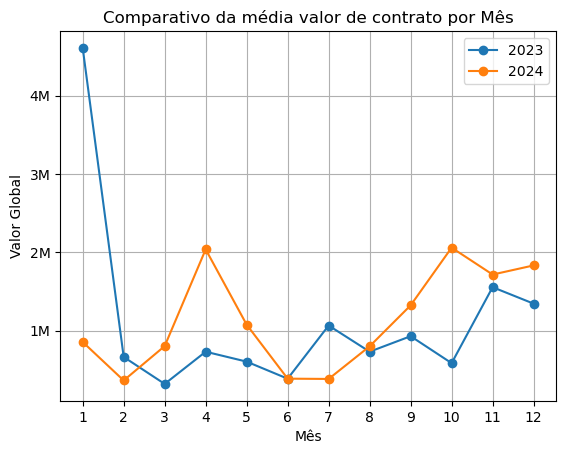

In [40]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd

# Agrupa por ano e mês
df_plot = energia_agru.groupby(['ano', 'mes'])['valorGlobal'].mean().reset_index()

# Função para criar série com todos os meses (1-12)
def completa_serie(ano):
    s = df_plot[df_plot['ano'] == ano].set_index('mes')['valorGlobal']
    s = s.reindex(range(1, 13), fill_value=0)  # preenche meses faltantes com 0
    return s

v3 = completa_serie(2023)
v4 = completa_serie(2024)



x = range(1, 13)

# Função para abreviar e arredondar valores
def abreviar_valor(x, pos):
    if x >= 1_000_000_000:
        return f'{x/1_000_000_000:.0f}B'
    elif x >= 1_000_000:
        return f'{x/1_000_000:.0f}M'
    elif x >= 1_000:
        return f'{x/1_000:.0f}K'
    else:
        return str(int(x))

plt.plot(x, v3, marker='o', label='2023')
plt.plot(x, v4, marker='o', label='2024')


plt.title('Comparativo da média valor de contrato por Mês')
plt.xlabel('Mês')
plt.ylabel('Valor Global')
plt.xticks(x)
plt.legend()
plt.grid(True)

# Aplica a abreviação no eixo Y
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(abreviar_valor))

plt.show()


In [ ]:
# Função para arredondar valores com notação científica


def abreviar_valor(x):
    if x >= 1_000_000_000:
        return f'{round(x/1_000_000_000)}B'
    elif x >= 1_000_000:
        return f'{round(x/1_000_000)}M'
    elif x >= 1_000:
        return f'{round(x/1_000)}K'
    else:
        return str(int(x))

# Aplica na coluna
df_plot['valorAbrev'] = df_plot['valorGlobal'].apply(abreviar_valor)

In [32]:
df_plot

,ano,mes,valorGlobal,valorAbrev
0,2023,1,4.607119e+06,5M
1,2023,2,6.635277e+05,664K
2,2023,3,3.196631e+05,320K
3,2023,4,7.306050e+05,731K
4,2023,5,6.040138e+05,604K
5,2023,6,3.863656e+05,386K
6,2023,7,1.064793e+06,1M
7,2023,8,7.309412e+05,731K
8,2023,9,9.285587e+05,929K
9,2023,10,5.846965e+05,585K


In [202]:
a = energia_agru[energia_agru['mes'] == 12 ]

b = a.groupby('ano').size() 

b

ano
2023     29
2024    187
2025      1
dtype: int64

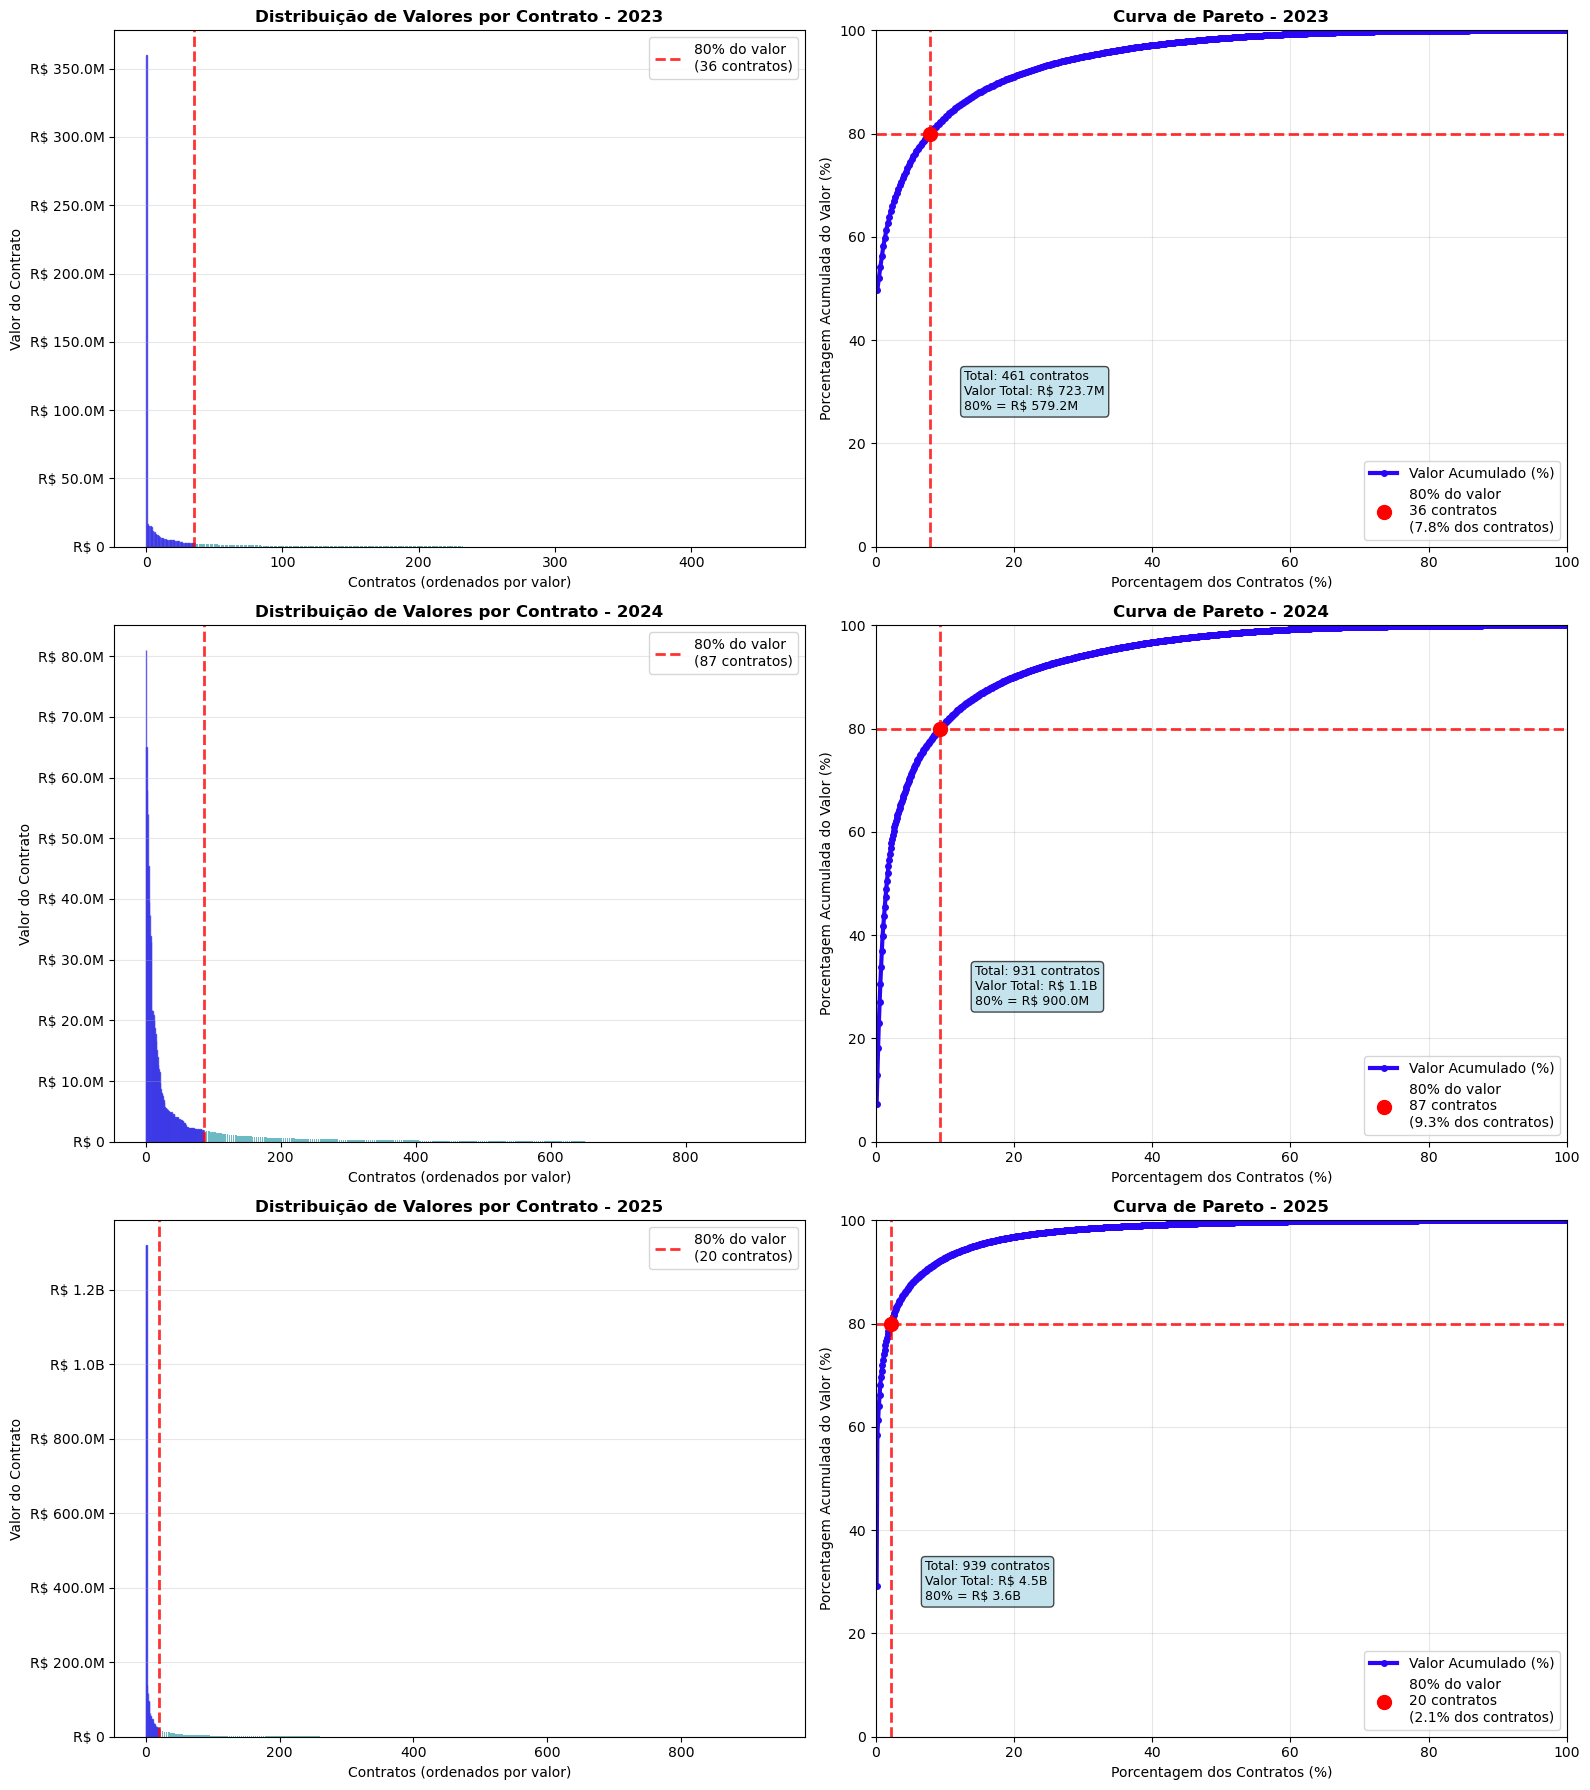

RESUMO EXECUTIVO - ANÁLISE DE PARETO

📊 ANO 2023:
   • Total de contratos: 461
   • Contratos que representam 80% do valor: 36
   • Isso representa 7.8% dos contratos
   • Valor total: R$ 723.7M
   • Valor dos 80%: R$ 579.2M
   • Top 5 contratos:
     - 15435906000582021: R$ 360.0M (49.7%)
     - 15484907000012022: R$ 16.8M (2.3%)
     - 15404806000072023: R$ 15.3M (2.1%)
     - 15305206020142022: R$ 15.1M (2.1%)
     - 18302307900672023: R$ 14.3M (2.0%)

📊 ANO 2024:
   • Total de contratos: 931
   • Contratos que representam 80% do valor: 87
   • Isso representa 9.3% dos contratos
   • Valor total: R$ 1.1B
   • Valor dos 80%: R$ 900.0M
   • Top 5 contratos:
     - 25446205900052024: R$ 81.0M (7.2%)
     - 92512905900322024: R$ 65.1M (5.8%)
     - 12019503000142023: R$ 58.0M (5.2%)
     - 76260005000092024: R$ 54.0M (4.8%)
     - 16031507000042024: R$ 45.5M (4.0%)

📊 ANO 2025:
   • Total de contratos: 939
   • Contratos que representam 80% do valor: 20
   • Isso representa 2.1% dos con

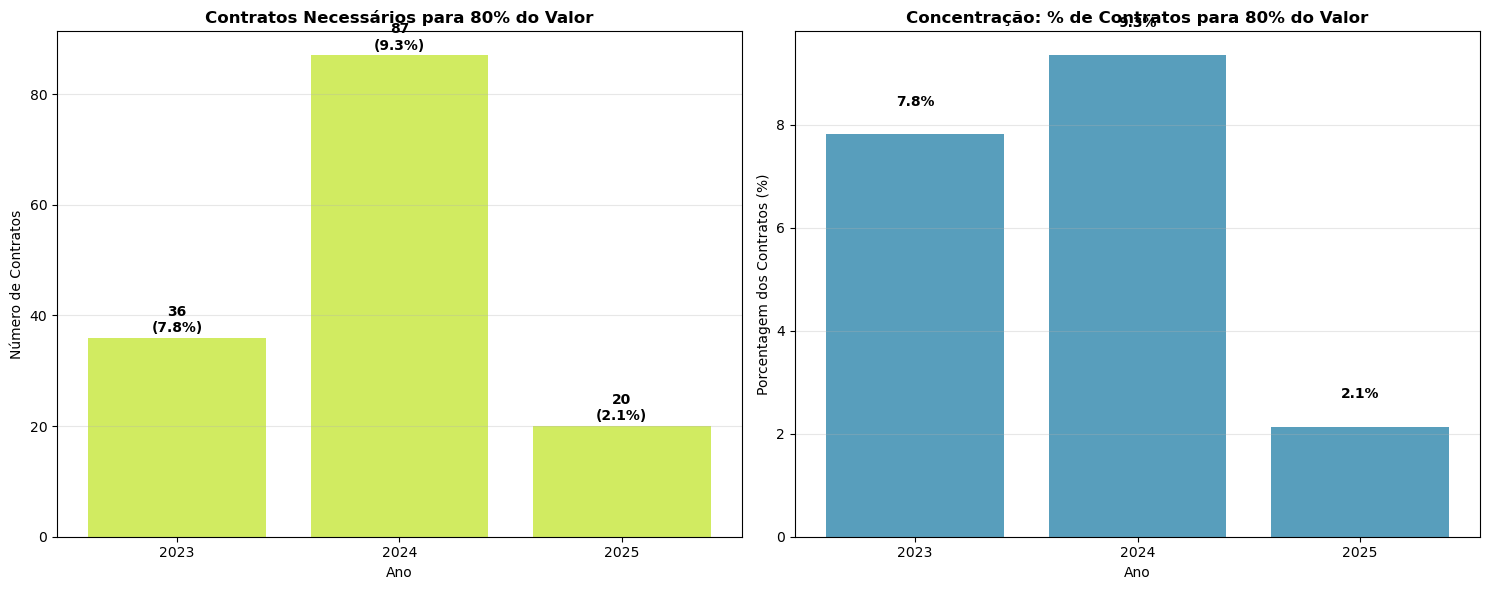

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

def criar_analise_pareto(df, ano_especifico=None, threshold_80=80):
    """
    Cria análise de Pareto para contratos por ano
    """
    if ano_especifico:
        anos_analisar = [ano_especifico]
    else:
        anos_analisar = sorted(df['ano'].unique())
    
    resultados_pareto = {}
    
    for ano in anos_analisar:
        df_ano = df[df['ano'] == ano].copy()
        
        # Agrupa por contrato e soma valores
        contratos_ano = df_ano.groupby('idCompra')['valorGlobal'].sum().reset_index()
        contratos_ano = contratos_ano.sort_values('valorGlobal', ascending=False).reset_index(drop=True)
        
        # Calcula porcentagem acumulada
        total_valor = contratos_ano['valorGlobal'].sum()
        contratos_ano['valor_perc'] = (contratos_ano['valorGlobal'] / total_valor) * 100
        contratos_ano['valor_perc_acum'] = contratos_ano['valor_perc'].cumsum()
        contratos_ano['posicao'] = range(1, len(contratos_ano) + 1)
        contratos_ano['perc_contratos'] = (contratos_ano['posicao'] / len(contratos_ano)) * 100
        
        # Encontra ponto dos 80%
        idx_80 = contratos_ano[contratos_ano['valor_perc_acum'] >= threshold_80].index[0]
        contratos_80 = idx_80 + 1
        perc_contratos_80 = (contratos_80 / len(contratos_ano)) * 100
        
        resultados_pareto[ano] = {
            'dados': contratos_ano,
            'contratos_80': contratos_80,
            'total_contratos': len(contratos_ano),
            'perc_contratos_80': perc_contratos_80,
            'valor_80': contratos_ano.iloc[:contratos_80]['valorGlobal'].sum(),
            'total_valor': total_valor
        }
    
    return resultados_pareto

# Função para abreviar valores monetários
def format_currency(x, pos=None):
    if x >= 1_000_000_000:
        return f'R$ {x/1_000_000_000:.1f}B'
    elif x >= 1_000_000:
        return f'R$ {x/1_000_000:.1f}M'
    elif x >= 1_000:
        return f'R$ {x/1_000:.0f}K'
    else:
        return f'R$ {x:.0f}'

# Executar análise de Pareto
resultados = criar_analise_pareto(energia_agru)

# Criar gráficos de Pareto para cada ano
anos = list(resultados.keys())
n_anos = len(anos)

# Configurar subplot
fig = plt.figure(figsize=(12, 6*n_anos))

for i, ano in enumerate(anos):
    dados = resultados[ano]['dados']
    
    # Curva de Pareto
    ax = plt.subplot(n_anos, 1, i + 1)
    
    # Linha da curva acumulada
    line1 = ax.plot(dados['perc_contratos'], dados['valor_perc_acum'], 
                    'o-', color="#2A06F7", linewidth=3, markersize=4, 
                    label='Valor Acumulado (%)')
    
    # Linha de referência 80%
    ax.axhline(y=80, color='red', linestyle='--', linewidth=2, alpha=0.8)
    ax.axvline(x=resultados[ano]['perc_contratos_80'], color='red', 
               linestyle='--', linewidth=2, alpha=0.8)
    
    # Ponto de destaque nos 80%
    contratos_80 = resultados[ano]['contratos_80']
    ax.plot(resultados[ano]['perc_contratos_80'], 80, 'ro', markersize=10, 
            label=f'80% do valor\n{contratos_80} contratos\n({resultados[ano]["perc_contratos_80"]:.1f}% dos contratos)')
    
    # Configurações do gráfico
    ax.set_title(f'Curva de Pareto - {ano}', fontsize=14, fontweight='bold')
    ax.set_xlabel('Porcentagem dos Contratos (%)')
    ax.set_ylabel('Porcentagem Acumulada do Valor (%)')
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 100)
    ax.grid(True, alpha=0.3)
    ax.legend(loc='lower right')
    
    # Adicionar texto informativo
    info_text = f'Total: {resultados[ano]["total_contratos"]} contratos\n'
    info_text += f'Valor Total: {format_currency(resultados[ano]["total_valor"])}\n'
    info_text += f'80% = {format_currency(resultados[ano]["valor_80"])}'
    
    # Calcular posição X para colocar a caixa à direita do corte
    x_pos = resultados[ano]['perc_contratos_80'] + 5
    if x_pos > 85:
        x_pos = resultados[ano]['perc_contratos_80'] - 25
        if x_pos < 5:
            x_pos = 50
    
    ax.text(x_pos, 30, info_text, transform=ax.transData, 
            bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.7),
            fontsize=9, verticalalignment='center', horizontalalignment='left')

plt.tight_layout()
plt.show()
